## Supervised Learning

### Regression

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import animation
import seaborn as sns
from IPython.display import HTML
sns.set()
%matplotlib inline

In [ ]:
num_data_points = 20
num_dims = 1
data_size = (num_data_points, num_dims)
x_scale = 20.
x_offset = -10.
noise_scale = 10.
weights_scale = np.array([10., 6.])
weights_offset = np.array([-5., -3.])

In [ ]:
weights = (np.random.random((num_dims + 1,)) * weights_scale) + weights_offset

In [ ]:
X = (np.random.random(data_size) * x_scale) + x_offset
Xa = np.concatenate((np.ones((num_data_points, 1)), X), 1)

In [ ]:
y = (Xa @ weights) + np.random.normal(0., noise_scale, (num_data_points,))

In [ ]:
fig_fit = plt.figure()
plt.xlabel('x')
plt.ylabel('y')
plt.title('True Relation')
ax_data = sns.scatterplot(x=Xa[:, 1], y=y)
sns.lineplot(x=Xa[:, 1], y=Xa @ weights, color='black', ax=ax_data)
plt.show()

In [ ]:
alpha = 1e-3 / num_data_points
w = (np.random.random((num_dims + 1,)) * weights_scale) + weights_offset
tolerance = 1e-3

In [ ]:
fig_fit, ax_fit = plt.subplots()
ax_fit.set_xlabel('x')
ax_fit.set_ylabel('y')

ax_fit.scatter(Xa[:, 1], y)
(fit_line,) = ax_fit.plot([], [], color='red')

yhat = Xa @ w
delta = y - yhat

def plot_line():
    global Xa, yhat, fit_line
    fit_line.set_data(Xa[:, 1], yhat)
    return (fit_line,)

def learn_and_animate(iteration):
    global Xa, y, yhat, delta, w, alpha, fit_line, ax_fit
    nabla_w = -2 * (delta @ Xa)
    w -= alpha * nabla_w
    yhat = Xa @ w
    delta = y - yhat
    fit_line.set_data(Xa[:, 1], yhat)
    ax_fit.set_title('Linear Regression (iteration ' + str(iteration) + ')')
    return (fit_line,)

anim = animation.FuncAnimation(fig_fit, learn_and_animate, init_func=plot_line, frames=100, interval=20, blit=True)
HTML(anim.to_jshtml())

In [ ]:
"""
iteration = 0
loss = np.infty
yhat = Xa @ w
delta = y - yhat
old_loss = loss
loss = delta @ delta
while np.abs(loss - old_loss) > tolerance:
    iteration += 1
    nabla_w = -2 * (delta @ Xa)
    w -= alpha * nabla_w
    yhat = Xa @ w
    delta = y - yhat
    old_loss = loss
    loss = delta @ delta
"""

In [ ]:
"""
fig_fit = plt.figure()
ax_fit = fig_fit.add_subplot(111)
plt.ion()

ax_fit.set_xlabel('x')
ax_fit.set_ylabel('y')
ax_fit.set_title('Linear Regression (iteration ' + str(iteration) + ')')

ax_fit.scatter(Xa[:, 1], y)
ax_fit.plot(Xa[:, 1], yhat, color='red')
ax_fit.plot(Xa[:, 1], Xa @ weights, color='black')

fig_fit.canvas.draw()
plt.show()
"""

### Classification

In [ ]:
import numpy as np
#from scipy import optimize
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import animation
import seaborn as sns
from IPython.display import HTML
sns.set()
%matplotlib inline

In [ ]:
num_data_points = 30
num_dims = 2
data_size = (num_data_points, num_dims)
x_scale = np.array([[20., 20.]])
x_offset = np.array([[-10., -10.]])
noise_scale = 10.
weights_scale = np.array([10., 6.])
weights_offset = np.array([-5., -3.])

In [ ]:
weights = (np.random.random((num_dims,)) * weights_scale) + weights_offset

In [ ]:
X = (np.random.random(data_size) * np.tile(x_scale, (num_data_points, 1))) + np.tile(x_offset, (num_data_points, 1))

In [ ]:
Xa = np.concatenate((np.ones((num_data_points, 1)), X[:, :-1]), 1)
z = (Xa @ weights) + np.random.normal(0., noise_scale, (num_data_points,))
classes = (z > X[:, -1]).astype(int)
y = (2 * classes) - 1

In [ ]:
fig_data = plt.figure()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Classes')
ax_data = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=classes)
sns.lineplot(x=Xa[:, 1], y=Xa @ weights, color='black', ax=ax_data)
plt.show()

In [ ]:
"""
w_trace = []
b_trace = []
def record_weights(xk, **kwargs):
    w_trace.append(xk[:num_dims + 1])
    b_trace.append(xk[num_dims + 1])
c = np.concatenate((np.zeros((num_dims + 1,)), np.ones((num_data_points,))))
A_ub = np.concatenate((np.tile(-y[:, None], (1, num_dims)) * X, -y[:, None], -np.eye(num_data_points)), 1)
b_ub = -np.ones((num_data_points, 1))
bounds = np.concatenate((np.tile([[None, None]], (num_dims + 1, 1)), np.tile([[0, None]], (num_data_points, 1))), 0)
result = optimize.linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='simplex', callback=record_weights).x
w = result[:num_dims]
b = result[num_dims]

fig_classify, ax_classify = plt.subplots()
ax_classify.set_xlabel('x')
ax_classify.set_ylabel('y')
hues = np.array(['blue', 'red'])
ax_classify.scatter(X[:, 0], X[:, 1], c=hues[classes])
(discriminant,) = ax_classify.plot([], [], color='green')

def animate(iteration):
    global X, w_trace, discriminant, ax_classify
    w = w_trace[iteration]
    b = b_trace[iteration]
    discriminant.set_data(X[:, 0], -(X[:, 0] * w[0]) - b)
    ax_classify.set_title('Unregularized SVM (iteration ' + str(iteration) + ')')
    return (discriminant,)

anim = animation.FuncAnimation(fig_classify, animate, frames=len(w_trace), interval=20, blit=True)
HTML(anim.to_jshtml())
"""

In [ ]:
alpha = 1e-1 / num_data_points
w = np.random.random((num_dims,))
b = np.random.random()
tolerance = 1e-3

In [ ]:
fig_classify, ax_classify = plt.subplots()
ax_classify.set_xlabel('x')
ax_classify.set_ylabel('y')

hues = np.array(['blue', 'red'])
ax_classify.scatter(X[:, 0], X[:, 1], c=hues[classes])
(discriminant,) = ax_classify.plot([], [], color='green')

def plot_line():
    global X, w, b, discriminant
    discriminant.set_data(X[:, 0], -(X[:, 0] * w[0]) - b)
    return (discriminant,)

def learn_and_animate(iteration):
    global X, y, w, b, alpha, discriminant, ax_classify
    zhat = (X @ w) + b
    mhat = y * zhat
    p1 = (mhat < 0)
    p2 = np.logical_and(np.logical_not(p1), (mhat < 1))
    a1 = y[None, p1]
    a2 = y[None, p2] - zhat[None, p2]
    nabla_w = np.squeeze((a1 @ X[p1, :]) + (a2 @ X[p2, :]))
    nabla_b = np.squeeze(np.sum(a1) + np.sum(a2))
    w -= alpha * nabla_w
    b -= alpha * nabla_b
    discriminant.set_data(X[:, 0], -(X[:, 0] * w[0]) - b)
    ax_classify.set_title('Unregularized SVM (iteration ' + str(iteration) + ')')
    return (discriminant,)

anim = animation.FuncAnimation(fig_classify, learn_and_animate, init_func=plot_line, frames=100, interval=20, blit=True)
HTML(anim.to_jshtml())

In [ ]:
"""
iteration = 0
loss = np.infty
zhat = (X @ w) + b
mhat = y * zhat
old_loss = loss
loss = -np.sum(mhat[mhat < 0])
while np.abs(loss - old_loss) > 0:
    iteration += 1
    zhat = (X @ w) + b
    mhat = y * zhat
    p1 = (mhat < 0)
    p2 = np.logical_and(np.logical_not(p1), (mhat < 1))
    a1 = -y[None, p1]
    a2 = zhat[None, p2] - y[None, p2]
    nabla_w = np.squeeze((a1 @ X[p1, :]) + (a2 @ X[p2, :]))
    nabla_b = np.squeeze(np.sum(a1) + np.sum(a2))
    w -= alpha * nabla_w
    b -= alpha * nabla_b
    old_loss = loss
    loss = -np.sum(mhat[p1])
"""

## Unsupervised Learning

### Autoregression

### Clustering

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import animation
import seaborn as sns
from IPython.display import HTML
sns.set()
%matplotlib inline

In [2]:
num_data_points = 30
num_dims = 2
data_size = (num_data_points, num_dims)
x_scale = np.array([[20., 20.]])
x_offset = np.array([[-10., -10.]])

In [3]:
X = (np.random.random(data_size) * np.tile(x_scale, (num_data_points, 1))) + np.tile(x_offset, (num_data_points, 1))

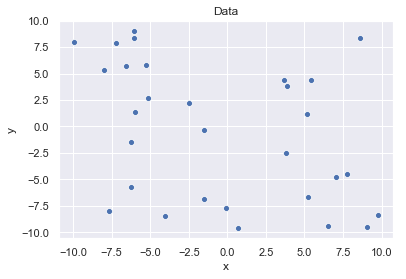

In [4]:
fig_data = plt.figure()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data')
ax_data = sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.show()

In [5]:
k = 3

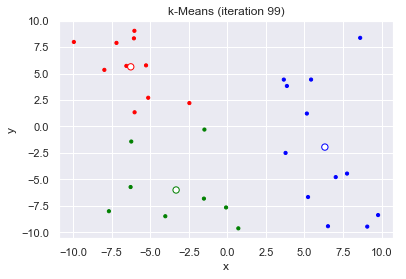

In [6]:
centres = (np.random.random((k, num_dims)) * np.tile(x_scale, (k, 1))) + np.tile(x_offset, (k, 1))

fig_cluster, ax_cluster = plt.subplots()
ax_cluster.set_xlabel('x')
ax_cluster.set_ylabel('y')

hues = np.array(['blue', 'red', 'green'])
centre_colors = np.array(['white'] * k)

data = np.concatenate((X, centres), 0)
sizes = np.concatenate((10 * np.ones((num_data_points,)), 40 * np.ones((k,))))
colors = np.concatenate((np.array((['black'] * num_data_points)), centre_colors))
edgecolors = np.concatenate((np.array(['black'] * num_data_points), hues))
scatter = ax_cluster.scatter(data[:, 0], data[:, 1], c=colors, marker='o', s=sizes, edgecolors=edgecolors, animated=True)

def cluster_and_animate(iteration):
    distances_sq = np.sum((np.tile(X[:, :, None], (1, 1, k)) - np.tile(centres[:, :, None].transpose((2, 1, 0)), (num_data_points, 1, 1))) ** 2, 1)
    y = np.argmin(distances_sq, 1)
    for i in np.arange(k):
        centres[i, :] = np.average(X[y == i, :], 0)
    data = np.concatenate((X, centres), 0)
    colors = np.concatenate((hues[y], centre_colors))
    edgecolors = np.concatenate((hues[y], hues))
    ax_cluster.set_title('k-Means (iteration ' + str(iteration) + ')')
    scatter.set_offsets(data)
    scatter.set_color(colors)
    scatter.set_edgecolor(edgecolors)
    return scatter,

anim = animation.FuncAnimation(fig_cluster, cluster_and_animate, frames=100, interval=20, blit=True)
HTML(anim.to_jshtml())

In [ ]:
"""
centres = (np.random.random((k, num_dims)) * np.tile(x_scale, (k, 1))) + np.tile(x_offset, (k, 1))
iteration = 0
y = -1 * np.ones((num_data_points,), dtype=int)
last_y = -2 * np.ones((num_data_points,), dtype=int)

while np.any(y != last_y):
    iteration += 1
    distances_sq = np.sum((np.tile(X[:, :, None], (1, 1, k)) - np.tile((centres)[:, :, None].transpose((2, 1, 0)), (num_data_points, 1, 1))) ** 2, 1)
    last_y = y
    y = np.argmin(distances_sq, 1)
    for i in np.arange(k):
        centres[i, :] = np.average(X[y == i, :], 0)
"""

In [ ]:
"""
fig_cluster, ax_cluster = plt.subplots()
ax_cluster.set_xlabel('x')
ax_cluster.set_ylabel('y')
plt.title('Data')

hues = np.array(['blue', 'red', 'green'])
ax_cluster.scatter(X[:, 0], X[:, 1], c=hues[y], marker='o', s=10)
ax_cluster.scatter(centres[:, 0], centres[:, 1], c=hues, marker='x', s = 40)

plt.show()
"""

## Reinforcement

## Manually-Implemented Classification Algorithm

## Overfitting Example

## Decision Trees

## k-Nearest Neighbors

## Linear Regression

### Linearly-Separable Data

## Kernels

## Support Vector Machines

### Hinge Loss

## Metrics

## Learning Curves: High-Bias vs. High Variance

## Regularizers

# Code

In [ ]:
from IPython.display import IFrame
IFrame('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', width=300, height=200)

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
type(iris)

In [ ]:
print(iris.data)

In [ ]:
print(iris.feature_names)

In [ ]:
print(iris.target)

In [ ]:
print(iris.target_names)